<a href="https://colab.research.google.com/github/ymstvk/2023_Intro_Python/blob/main/Copie_de_W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

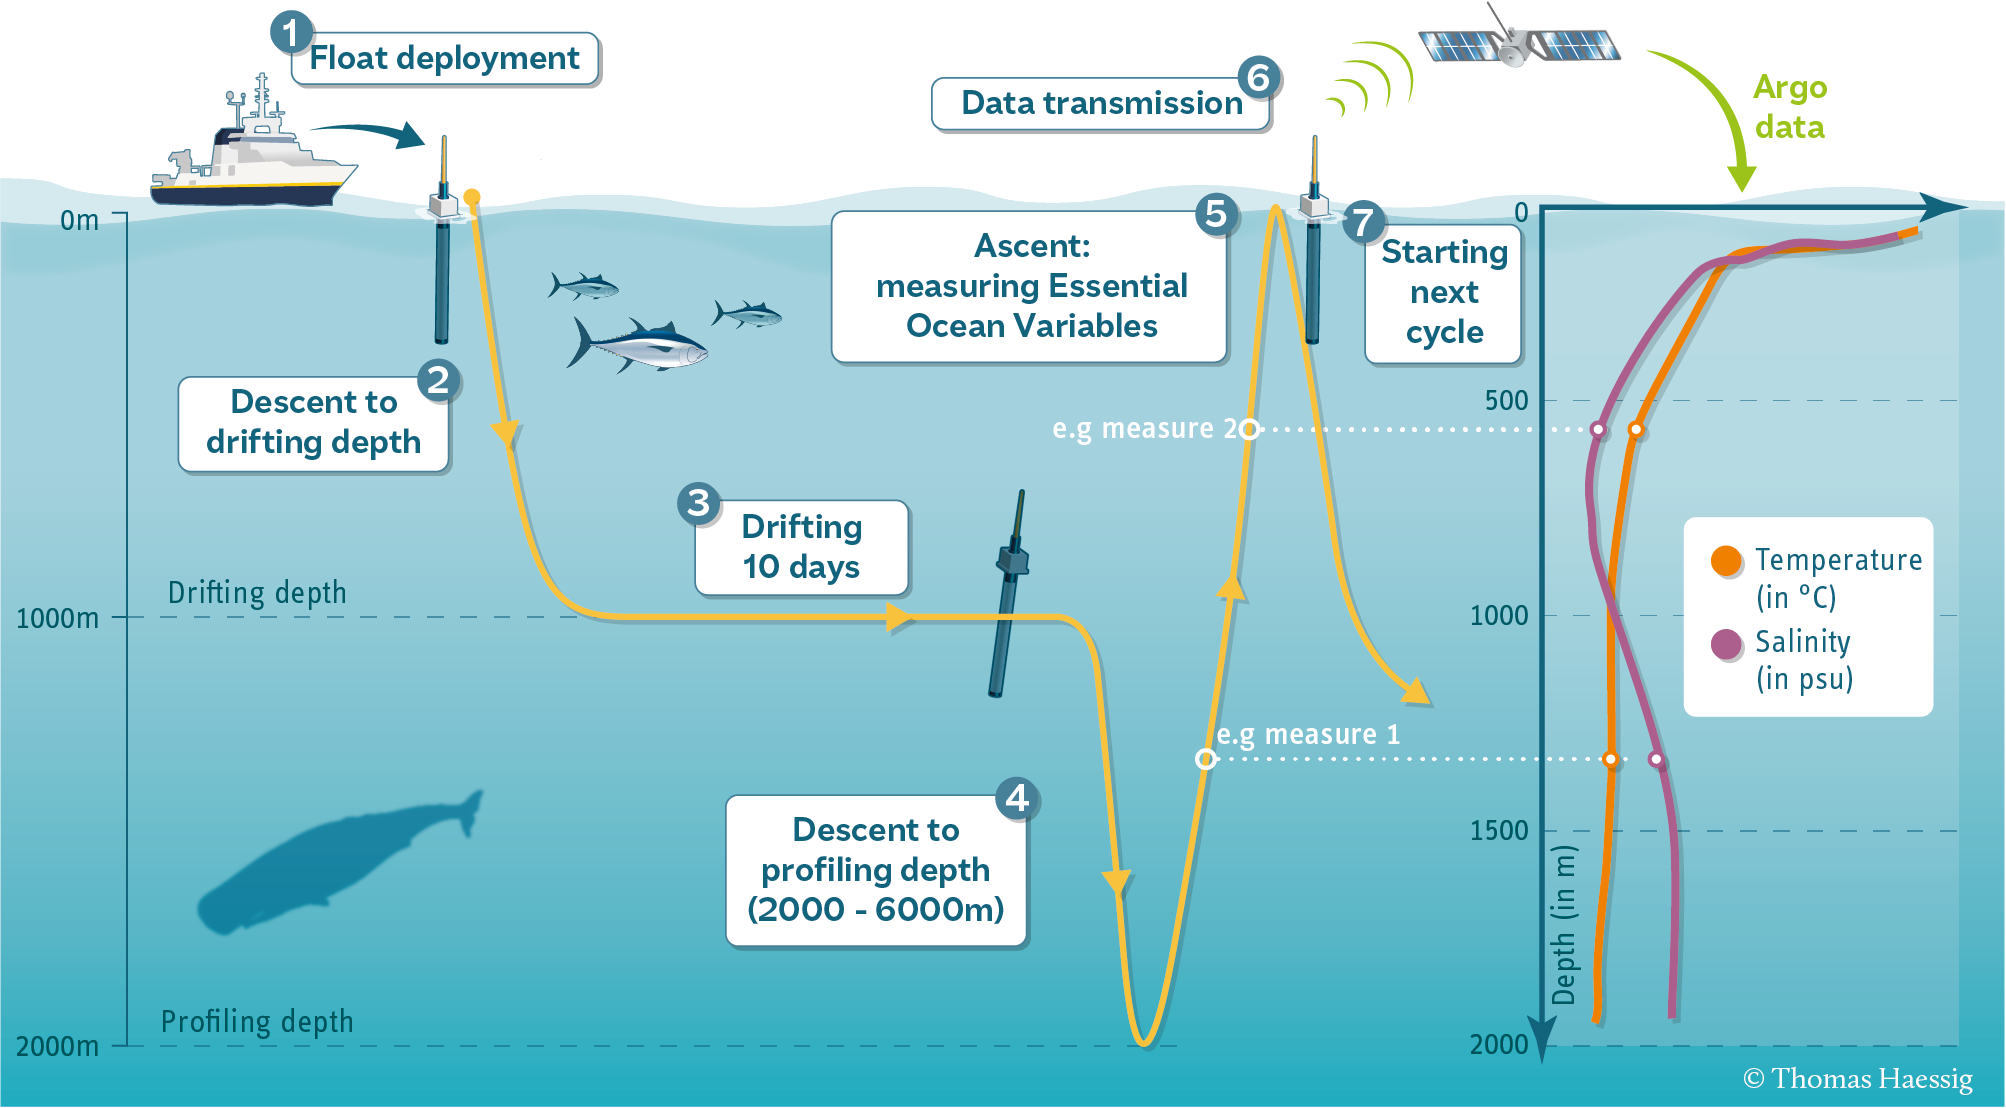


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [66]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy']

In [17]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [67]:


level =('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy')
T = ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy')
P = ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy')
date =('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy')
lat = ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy')
S = ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy')
lon= ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy')

Then, load the files as `numpy` arrays, for instance using list comprehension

In [68]:

level,T,P,date,lat,S,lon = [np.load(files[i]) for i in range(len(files))]


In [20]:
print(S)


[[35.6389389  35.51495743 35.57297134 ... 35.82093811 35.77793884
  35.66891098]
 [35.63393784 35.5219574  35.57397079 ... 35.81093216 35.58389664
  35.66791153]
 [35.6819458  35.52595901 35.57297134 ... 35.79592896 35.66290665
  35.66591263]
 ...
 [34.91585922 34.92390442 34.92390442 ... 34.93481064 34.94081116
  34.94680786]
 [34.91585922 34.92390442 34.92190552 ... 34.93280792 34.93680954
  34.94380951]
 [34.91785812 34.92390442 34.92390442 ...         nan 34.93680954
          nan]]


**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [21]:
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [22]:
level_arange = np.arange(78)
level_arange

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [23]:
np.testing.assert_equal(level,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [24]:
level_linspace = np.linspace(0,77,78)

Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [25]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [27]:
T.shape, S.shape, P.shape

((78, 75), (78, 75), (78, 75))

In [28]:
lon.shape, lat.shape, level.shape

((75,), (75,), (78,))

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [29]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [30]:
!pip install gsw
from gsw import CT_from_t

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.6 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [31]:
conservative_t = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [32]:
relative_density = a*S+b*conservative_t+c*(conservative_t**2)

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [33]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

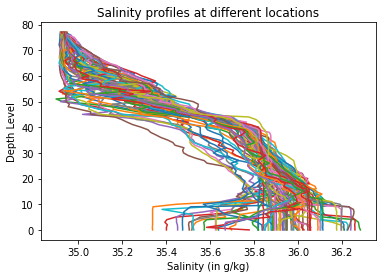

Text(0.5, 1.0, 'Temperature profile at different depth')

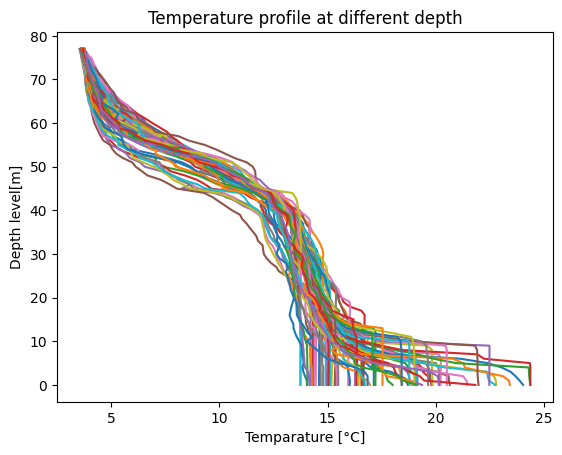

In [35]:
plt.plot(T,level); # The semi-colon prevents printing the line objects
plt.xlabel('Temparature [°C]') # Takes a string as argument
plt.ylabel('Depth level[m]')
plt.title('Temperature profile at different depth')

Make more plots below:

Text(0.5, 1.0, 'Salinity level at different locations')

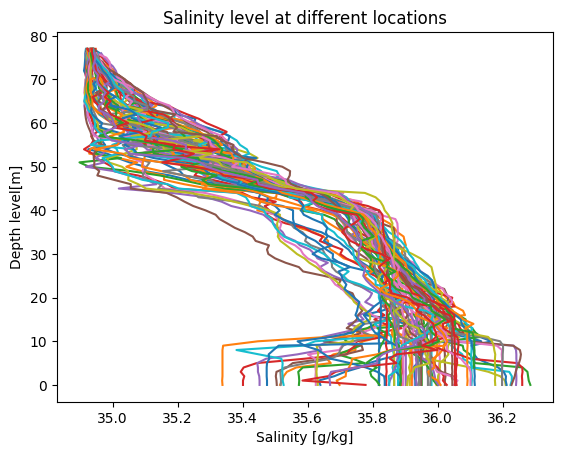

In [36]:
plt.plot(S,level); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity [g/kg]') # Takes a string as argument
plt.ylabel('Depth level[m]')
plt.title('Salinity level at different locations')

Text(0.5, 1.0, 'Relative density profile at different depth')

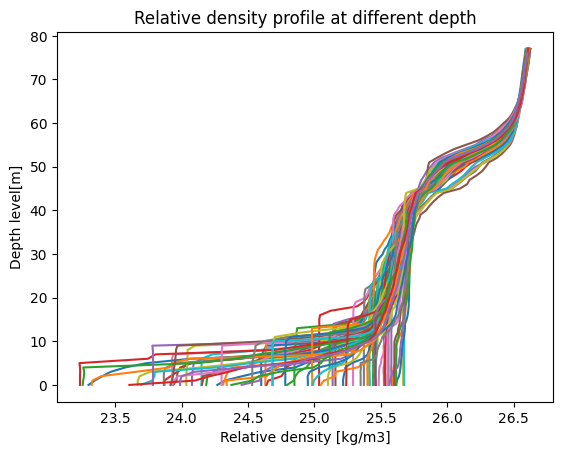

In [37]:
plt.plot(relative_density,level); # The semi-colon prevents printing the line objects
plt.xlabel('Relative density [kg/m3]') # Takes a string as argument
plt.ylabel('Depth level[m]')
plt.title('Relative density profile at different depth')

Text(0.5, 1.0, 'Pressure profile at different depth')

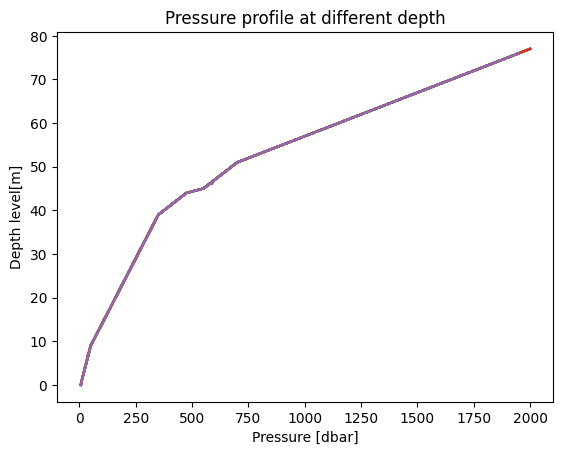

In [39]:
plt.plot(P,level); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure [dbar]') # Takes a string as argument
plt.ylabel('Depth level[m]')
plt.title('Pressure profile at different depth')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [41]:
mean_T = np.mean(T,axis= 1)
mean_T.shape

(78,)

In [43]:
mean_S = np.mean(S,axis= 1)
mean_S.shape

(78,)

In [44]:
mean_P = np.mean(S,axis=1)
mean_P.shape

(78,)

In [45]:
mean_relden = np.mean(relative_density, axis = 1)
mean_relden.shape

(78,)

... and the standard deviations.

In [46]:
std_T = np.std(T,axis= 1)
std_T.shape

(78,)

In [47]:
std_S = np.std(S,axis=1)
std_S.shape

(78,)

In [48]:
std_P = np.std(P, axis=1)
std_P.shape

(78,)

In [49]:
std_relden= np.std(relative_density, axis=1)
std_relden.shape

(78,)

Check that they have the same shape as your vertical level `lev` coordinate:

In [51]:
np.testing.assert_equal(mean_T.shape,level.shape)
np.testing.assert_equal(mean_S.shape,level.shape)
np.testing.assert_equal(mean_P.shape,level.shape)
np.testing.assert_equal(mean_relden.shape,level.shape)

np.testing.assert_equal(std_T.shape,level.shape)
np.testing.assert_equal(std_S.shape,level.shape)
np.testing.assert_equal(std_P.shape,level.shape)
np.testing.assert_equal(std_relden.shape,level.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

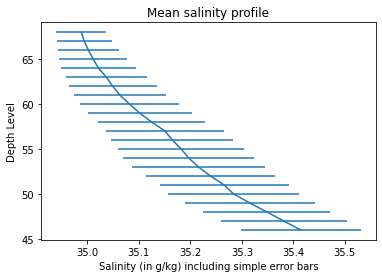

Text(0.5, 1.0, 'Mean temperature profile')

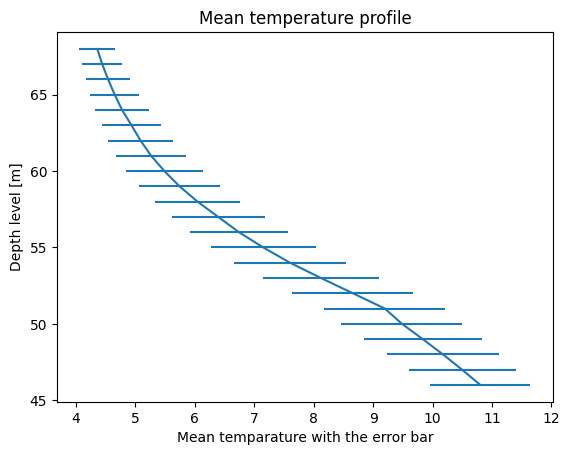

In [52]:
plt.errorbar(mean_T,level,xerr=std_T)
plt.xlabel('Mean temparature with the error bar' )
plt.ylabel('Depth level [m]')
plt.title('Mean temperature profile ')

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean sanility profile')

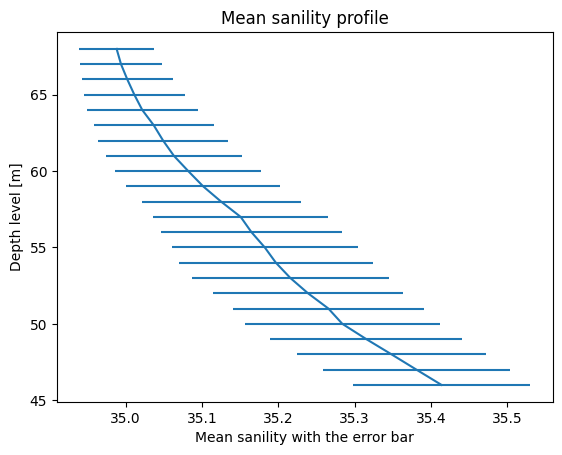

In [53]:
plt.errorbar(mean_S,level,xerr=std_S)
plt.xlabel('Mean sanility with the error bar' )
plt.ylabel('Depth level [m]')
plt.title('Mean sanility profile ')

Text(0.5, 1.0, 'Mean pressure profile')

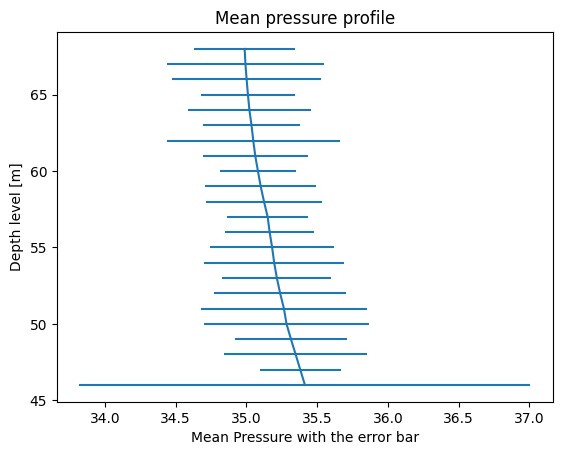

In [54]:
plt.errorbar(mean_P,level,xerr=std_P)
plt.xlabel('Mean Pressure with the error bar' )
plt.ylabel('Depth level [m]')
plt.title('Mean pressure profile ')

Text(0.5, 1.0, 'Mean relative density profile')

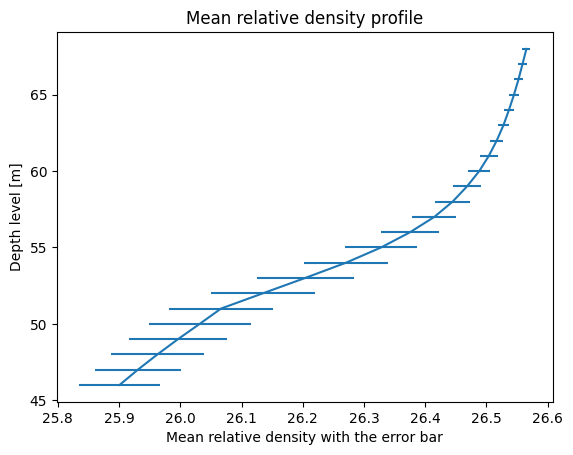

In [55]:
plt.errorbar(mean_relden,level,xerr=std_relden)
plt.xlabel('Mean relative density with the error bar' )
plt.ylabel('Depth level [m]')
plt.title('Mean relative density profile ')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [56]:
nanmean_T = np.nanmean(T,axis= 1)
nanmean_S = np.nanmean(S,axis= 1)
nanmean_P = np.nanmean(P,axis= 1)
nanmean_relden = np.nanmean(relative_density,axis= 1)

Similarly, recalculate the standard deviations ignoring the missing values.

In [57]:
nanstd_T = np.nanstd(T,axis= 1)
nanstd_S = np.nanstd(S,axis= 1)
nanstd_P = np.nanstd(P,axis= 1)
nanstd_relden= np.nanstd(relative_density, axis=1)

In [63]:
nanmean_T.shape

(78,)

In [70]:
level.shape

(78,)

In [69]:
level

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Text(0.5, 1.0, 'Mean temperature profile')

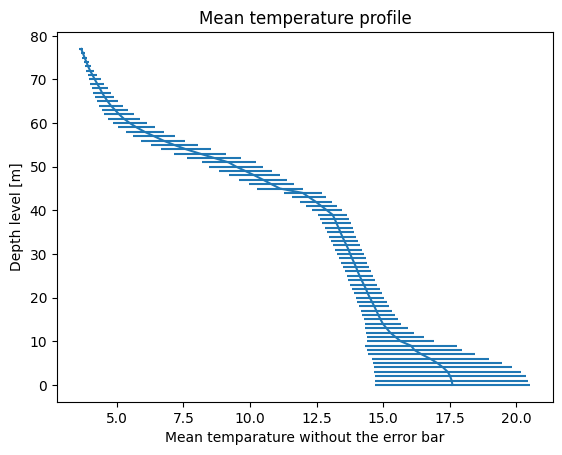

In [71]:
plt.errorbar(nanmean_T,level,xerr= nanstd_T)
plt.xlabel('Mean temparature ' )
plt.ylabel('Depth level [m]')
plt.title('Mean temperature profile without the error bar')

Text(0.5, 1.0, 'Mean sanility profile')

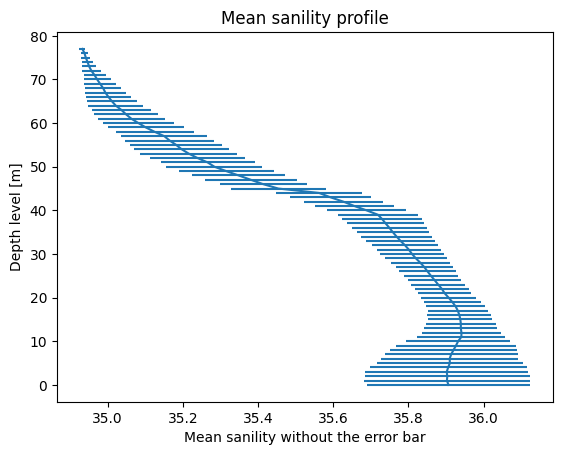

In [72]:
plt.errorbar(nanmean_S,level,xerr=nanstd_S)
plt.xlabel('Mean sanility ' )
plt.ylabel('Depth level [m]')
plt.title('Mean sanility profile without the error bar')

Text(0.5, 1.0, 'Mean pressure profile')

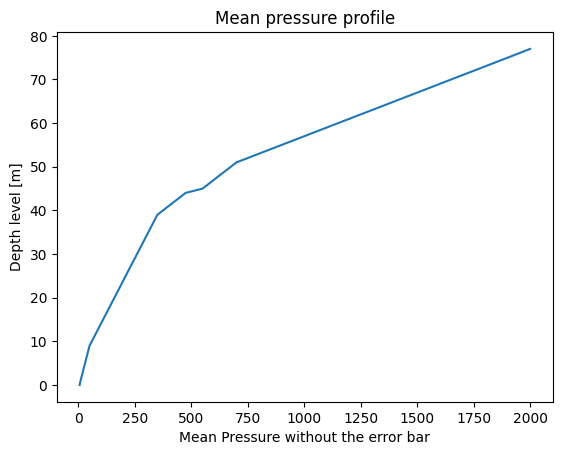

In [73]:
plt.errorbar(nanmean_P,level,xerr=nanstd_P)
plt.xlabel('Mean Pressure ' )
plt.ylabel('Depth level [m]')
plt.title('Mean pressure profile without the error bar')

Text(0.5, 1.0, 'Mean relative density profile')

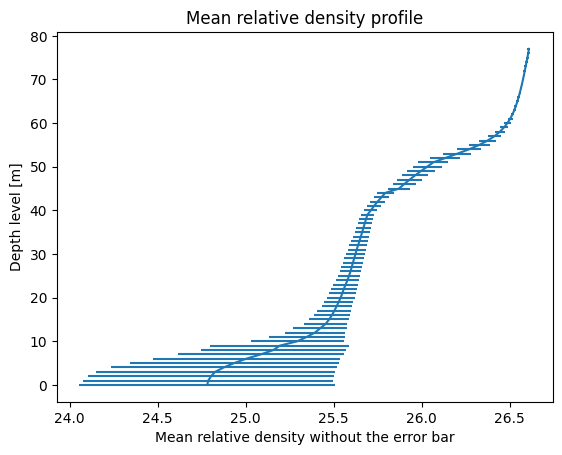

In [74]:
plt.errorbar(nanmean_relden,level,xerr=nanstd_relden)
plt.xlabel('Mean relative density ' )
plt.ylabel('Depth level [m]')
plt.title('Mean relative density profile without the error bar')

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

(Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Coordinates of the ARGO floats'))

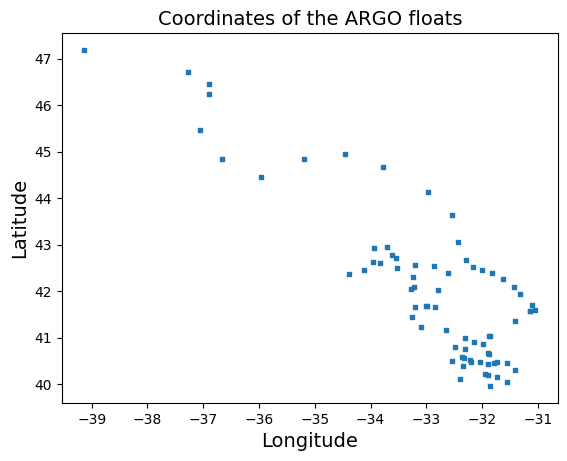

In [77]:
plt.scatter(lon,lat,s=12,marker='s')
plt.xlabel('Longitude',fontsize=14),plt.ylabel('Latitude',fontsize=14),plt.title('Coordinates of the ARGO floats',fontsize=14) # Fancy bonuses
